**Fyttly Data Science Team Test**

In [1]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.linear_model import LinearRegression

In [2]:
warnings.filterwarnings('ignore')

**Part 0: Reading the data**

In [27]:
# loading the data
data = pd.read_csv('Fytlyff_DS_Interview.csv', delimiter=',')

In [28]:
# Return the first 5 rows.
data.head()

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461
3,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Indore,NaN,NaN,320923,110667
4,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Pune,NaN,NaN,220937,46033


In [29]:
# Return the dtypes in the DataFrame.
data.dtypes

Year                                                                                                                           int64
Month                                                                                                                         object
MobileWeb_or_Web                                                                                                              object
Type_of_Customers?                                                                                                            object
Where_Are_They_comming_from?                                                                                                  object
Which_Place_in_India?                                                                                                         object
How_many_Landed_on_our_Page?                                                                                                 float64
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?             

**Part 1: Data cleaning**

In [30]:
def data_cleaning(df):
    # replacing the NA values with 0s.
    df = df.replace(np.nan, 0)
    # replacing month from month_abr to number in col B
    df['Month'] = pd.to_datetime(data['Month'], format='%b').dt.month
    # replacing values in col E.
    df['Where_Are_They_comming_from?'] = df['Where_Are_They_comming_from?'].replace({'Came_From_Google':'Google', 
                                                     'Landed_on_the_page_Directly':'Direct_traffic'})
    return df

In [31]:
data = data_cleaning(data)

**Part 2: Descriptive statistics**

In [32]:
def descriptive_stats(df):
    # generate statistical summary
    df = df.describe()
    return df

In [34]:
descriptive_stats(data)

,Year,Month,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
count,2160.000000,2160.000000,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03
mean,2020.000000,6.500000,3.922474e+05,1.792281e+05,1.510725e+05,5.922129e+04
std,0.816686,3.452852,9.555773e+05,3.951562e+05,2.353538e+05,8.646564e+04
min,2019.000000,1.000000,0.000000e+00,0.000000e+00,3.761000e+03,7.660000e+02
25%,2019.000000,3.750000,0.000000e+00,0.000000e+00,3.360800e+04,1.157725e+04
50%,2020.000000,6.500000,1.228350e+04,4.212500e+03,7.064950e+04,2.700450e+04
75%,2021.000000,9.250000,3.816422e+05,1.730452e+05,1.659590e+05,7.185350e+04
max,2021.000000,12.000000,1.127413e+07,4.079301e+06,3.022858e+06,1.251258e+06


In [35]:
# print list of unique values
data.nunique()

Year                                                                                                                            3
Month                                                                                                                          12
MobileWeb_or_Web                                                                                                                2
Type_of_Customers?                                                                                                              2
Where_Are_They_comming_from?                                                                                                    3
Which_Place_in_India?                                                                                                           5
How_many_Landed_on_our_Page?                                                                                                 1080
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?                                  

**Part 3: Perscriptive statistics**

In [10]:
# which place in India has highest landed page
(data
 .groupby('Which_Place_in_India?')
 ['How_many_Landed_on_our_Page?']
 .agg('max')
 .sort_values(ascending=False)
)

Which_Place_in_India?
Pune         11274131.0
Indore        5706772.0
Chennai       4605196.0
Dehradun      2255791.0
Bangalore     1645248.0
Name: How_many_Landed_on_our_Page?, dtype: float64

In [11]:
# which place in India has highest landed page clicked on button
(data
 .groupby('Which_Place_in_India?')
 ['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']
 .agg('max')
 .sort_values(ascending=False)
)

Which_Place_in_India?
Indore       1251258
Pune          923720
Dehradun      873534
Bangalore     502226
Chennai       430733
Name: How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?, dtype: int64

**Part 4: Simple Machine Learning**

In [12]:
# assign independent variable to X
X = data.drop(['How_many_Landed_on_the_our_Page_and_clicked_on_a_button?'], axis=1)
# assign dependent variable to y
y = data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button?']

In [13]:
# Encode categorical features as an integer.
X.iloc[:, 2:6] = OrdinalEncoder().fit_transform(X.iloc[:, 2:6])

In [14]:
# Split arrays or matrices into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [15]:
# Standardize features by removing the mean and scaling to unit variance.
scale = StandardScaler()
# Fit to data, then transform it.
x_train = scale.fit_transform(x_train)
# Perform standardization by centering and scaling.
x_test = scale.transform(x_test)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
def pred_future(model, x_test, y_test):
    # Predict using the linear model.
    y_pred = model.predict(x_test)
    # Mean absolute percentage error (MAPE) regression loss.
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # print mape accuracy
    print('Mean Absolute Percentage Error: {:.3}'.format(mape))

In [18]:
pred_future(model, x_test, y_test)

Mean Absolute Percentage Error: 9.83e+19


**Part 5: Visualization**

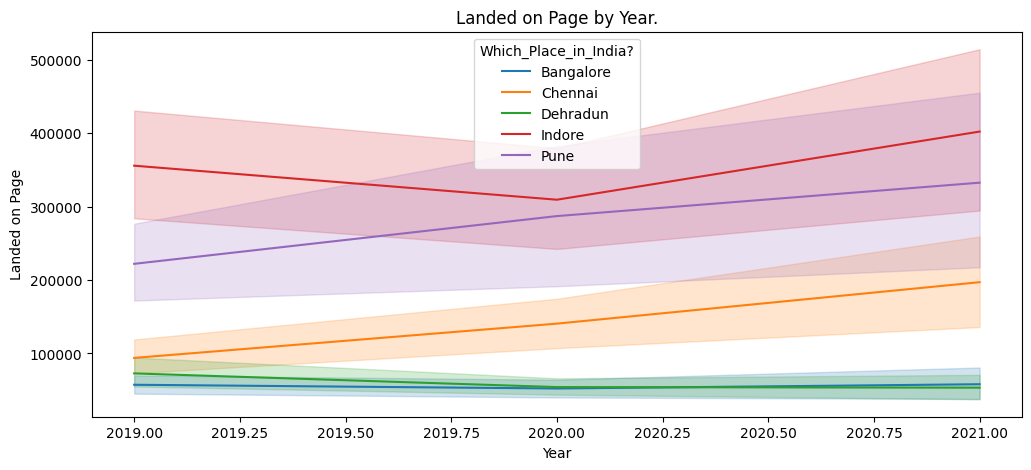

In [19]:
# Landed on Page by Year.
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, x='Year', y='How_many_Landed_on_the_our_Page_and_clicked_on_a_button?', hue='Which_Place_in_India?')
plt.title('Landed on Page by Year.')
plt.xlabel('Year')
plt.ylabel('Landed on Page')
plt.show()

**Part 6: About the Previous Project**

One of the most interesting project I have worked and still working on was a hybrid technique for credit card fraud detection in nigerai banking system. I found it interesting because of the of the import it will have on the nigeria banking system. I persornally have working on, which after developement it will be deployed.I actually found it interesting because of the challenges the financial institution are facing alot of fraudulent transaction are been almost daily and it ever difficult to detect such transaction as human. But with the help of these algorithm trained on past historic transaction, to will learn to distinguish between fraudulent and none fraudulent transaction when deployed on the banking system serve. Cutting edge technology library and package were used in building the machine learning model, I choose to use neural network in developing model and optimize it using genetic algorithm. Below is the link to the project github repo

https://github.com/SilasEmma/FraudProject

**Part 7: Time management**

I highly passionate, motivated and result oriented persorn, willing to go an extra mile in order to archieve my aim or goal and learn along the way. As a machine learning with versed experience I have built several project which have been deployed on production. I am confident that if selected or if given the opportunity, i will thrive and deliver high quality of work within the stipulated time or deadline. I look forward to contributing my skills and experiences to your organiztion if given the opportunity.